In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pycaret.datasets import get_data#step1

In [3]:
data = get_data('insurance')# setp2

# yes , no
# 1   , 0
# 1   , 0

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Convert categorical data into one hot encode

In [8]:
df = pd.DataFrame({"Sex":["Femal","Male","Other"]})
df

,Sex
0,Femal
1,Male
2,Other


In [9]:
pd.get_dummies(df["Sex"])

,Femal,Male,Other
0,1,0,0
1,0,1,0
2,0,0,1


# Create firs pycaret Regression Model

In [10]:
from pycaret.regression import *# step3

In [11]:
s = setup(data, target="charges") #step4

,Description,Value
0,session_id,5883
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [15]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [16]:
data.children.unique()

array([0, 1, 3, 2, 5, 4])

In [17]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2469.3892,21116412.2253,4545.9587,0.8558,0.4068,0.2763,0.0340
lightgbm,Light Gradient Boosting Machine,2833.6730,23504045.6310,4797.0284,0.8401,0.5199,0.3445,0.0240
rf,Random Forest Regressor,2698.1148,24178245.1269,4879.0450,0.8342,0.4424,0.3051,0.1250
ada,AdaBoost Regressor,3956.7851,26259467.8121,5100.7740,0.8156,0.5782,0.6358,0.0150
et,Extra Trees Regressor,2660.0074,27735893.5759,5222.6754,0.8077,0.4478,0.2791,0.1100
ridge,Ridge Regression,4185.5353,37902820.8000,6085.9045,0.7411,0.6002,0.4046,0.0060
llar,Lasso Least Angle Regression,4169.8855,37912344.7028,6086.1524,0.7411,0.5752,0.4022,0.0070
br,Bayesian Ridge,4182.2757,37908336.8142,6086.0782,0.7411,0.6060,0.4040,0.0060
lasso,Lasso Regression,4171.7021,37909093.6000,6085.5146,0.7410,0.6052,0.4024,0.0100
lr,Linear Regression,4171.4741,37914014.2000,6085.7406,0.7410,0.6043,0.4023,0.2870


In [18]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5883, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


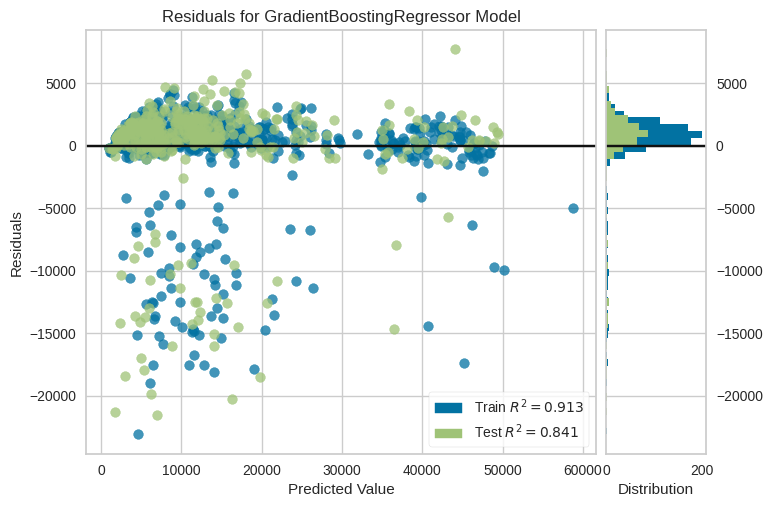

In [19]:
plot_model(best, plot='residuals')

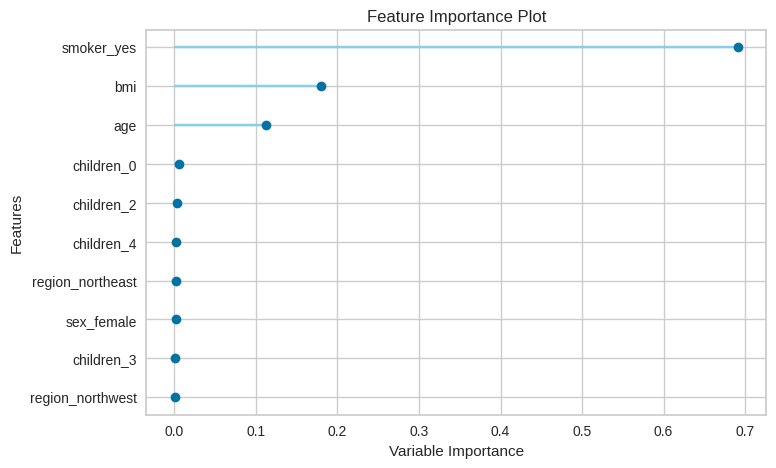

In [20]:
plot_model(best, plot = 'feature')

In [21]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2516.3354,21642095.1736,4652.1065,0.8407,0.4194,0.2599


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,53.0,36.860001,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,46661.441406,47086.230317
1,40.0,41.230000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6610.109863,7453.980504
2,63.0,41.470001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13405.390625,13728.190192
3,38.0,19.950001,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7133.902344,6450.967598
4,58.0,22.770000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11833.782227,12479.648588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,55.0,30.684999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,42303.691406,44768.720840
398,50.0,25.600000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8932.083984,10997.131009
399,39.0,34.320000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8596.828125,7792.137797
400,43.0,35.720001,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19144.576172,9594.956833


In [22]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2105.6308,15737480.0176,3967.0493,0.8926,0.3563,0.2373


,age,sex,bmi,children,smoker,region,charges,Label
0,19,female,27.900,0,yes,southwest,16884.92400,18483.981990
1,18,male,33.770,1,no,southeast,1725.55230,3581.478314
2,28,male,33.000,3,no,southeast,4449.46200,5756.225331
3,33,male,22.705,0,no,northwest,21984.47061,4981.508948
4,32,male,28.880,0,no,northwest,3866.85520,4217.003075


# Save model

In [23]:
save_model(best, 'my_best_pipline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

# Load model

In [24]:
loaded_model = load_model("my_best_pipline")
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_dec

In [25]:
df1 = predict_model(loaded_model,data)
df1

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2105.6308,15737480.0176,3967.0493,0.8926,0.3563,0.2373


,age,sex,bmi,children,smoker,region,charges,Label
0,19,female,27.900,0,yes,southwest,16884.92400,18483.981990
1,18,male,33.770,1,no,southeast,1725.55230,3581.478314
2,28,male,33.000,3,no,southeast,4449.46200,5756.225331
3,33,male,22.705,0,no,northwest,21984.47061,4981.508948
4,32,male,28.880,0,no,northwest,3866.85520,4217.003075
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,11520.472064
1334,18,female,31.920,0,no,northeast,2205.98080,3150.632843
1335,18,female,36.850,0,no,southeast,1629.83350,2653.421815
1336,21,female,25.800,0,no,southwest,2007.94500,2698.196760


In [26]:
df1.to_excel("data1.xlsx", index=False)

ModuleNotFoundError: No module named 'openpyxl'

# Attendance

In [5]:
import re
import pandas as pd
import numpy as np

In [7]:
x = """
You4:16 PM
We will class within 2 or 3 minutes
start
Imran Ali4:38 PM
4210176950677
Muhammad Fahad4:39 PM
today's class started at 4:15 or 4:30 pm?
Farrukh Jalil4:39 PM
4:15
Syed Sajjad Ali Shah5:11 PM
1510120026221
TARIQ JAMIL5:17 PM
42501-8229854-5
syed daniyal5:18 PM
4250189782769
Zoya Ansari5:32 PM
4220186465696
Nadir Ali5:32 PM
4130311530273
Syed Umair Ahmed5:33 PM
4130485196673
Muhammad Fahad5:33 PM
4210117498405
Bilal Uddin5:33 PM
4220122191357
Syed Zaim Nazir5:33 PM
4220171026219
Abdullah Mukhtar5:35 PM
4210175758189
Farrukh Jalil5:37 PM
4210113978763
Rizwan Ali5:38 PM
4230174256393
MUSTAFA NADIMI5:39 PM
540053241639
5440053241639
Muneeb Abdul Rauf5:40 PM
4230181544787
Madiha Obaid Obaid5:40 PM
4220105920780
Zoya Ansari5:40 PM
4220186465696
You5:47 PM
from flask import Flask

app = Flask(__name__)

@app.route("/")
def index():
    return "Hello World!"

app.run(debug=True)
Syeda Zehra Nadeem5:51 PM
4230123587896
Agha Zohaib5:52 PM
4210168710111
Farrukh Jalil5:56 PM
What is the machine configuration for ML and DL Studies?
Farrukh Jalil6:28 PM
4210113978763
Amna Shahid6:28 PM
3460348242756
Syed Abbas Abbas6:28 PM
1234567890123
Kenneth Fahad6:28 PM
3310541597331
mcc-qjtf-rix
""".replace("-","")
df = pd.DataFrame(list(set(re.findall("\d{13}",x))), columns=["CNIC"])
df.to_excel("class6.xlsx",index=False)
print(len(df))
df

21


,CNIC
0,1510120026221
1,4250182298545
2,4230123587896
3,3310541597331
4,5440053241639
5,4210168710111
6,4130485196673
7,4220186465696
8,4220171026219
9,1234567890123
